When a business aims to find patterns in their customer's habits without having a predefined target variable or outcome, the task is best approached as an unsupervised learning problem. Unsupervised learning is used to draw inferences from datasets consisting of input data without labeled responses. It's ideal for exploring the underlying structure or distribution in the data, such as grouping or clustering of data points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('/content/income_data.csv')
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
customer_df.drop(['CustomerID'], axis=1, inplace=True)

In [18]:
print(len(customer_df))
print(customer_df.isnull().sum())
customer_df.nunique()

200
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

From above, there are 200 observation, no missing values, and #of unique values are:
CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84

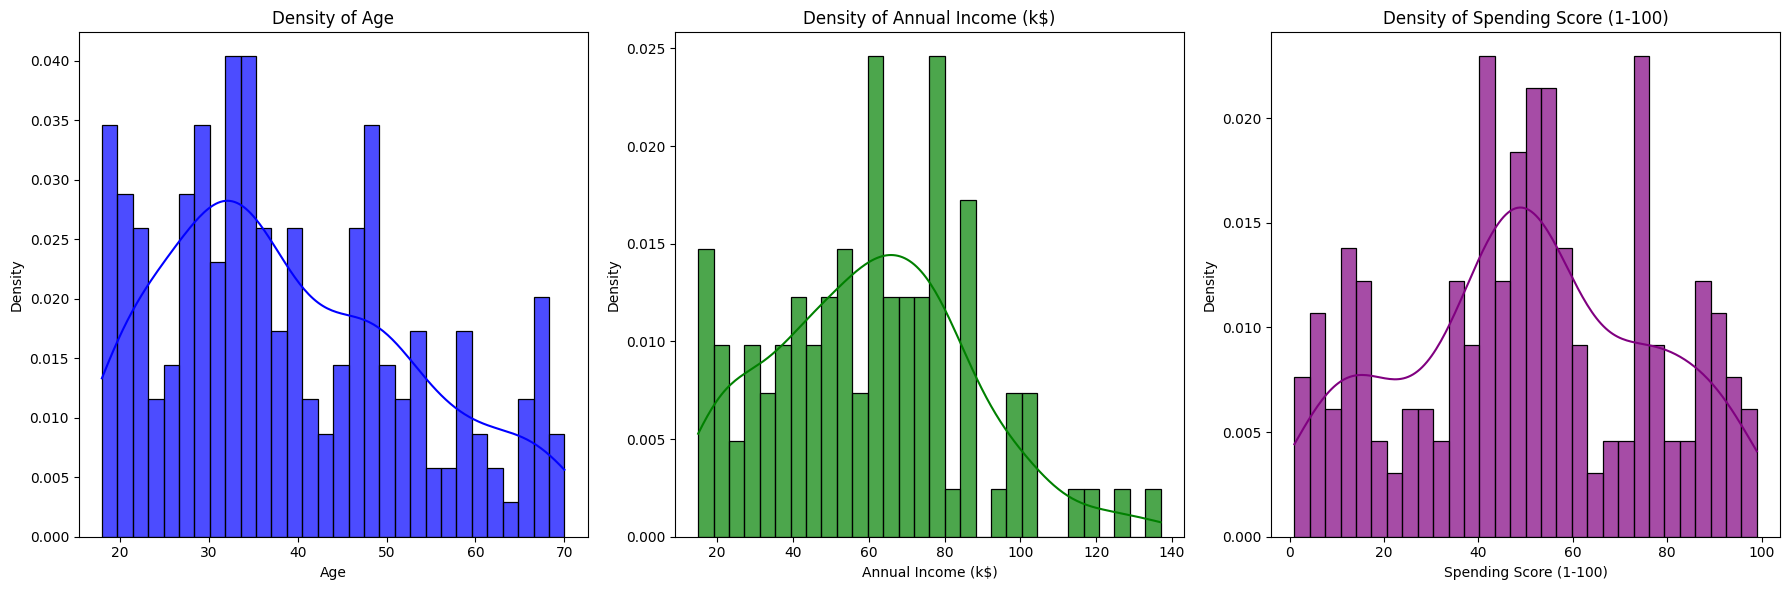

In [19]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(customer_df['Age'], bins=30, kde=True, color='blue', alpha=0.7, stat='density')
plt.title('Density of Age')
plt.xlabel('Age')
plt.ylabel('Density')

plt.subplot(1, 3, 2)
sns.histplot(customer_df['Annual Income (k$)'], bins=30, kde=True, color='green', alpha=0.7, stat='density')
plt.title('Density of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
sns.histplot(customer_df['Spending Score (1-100)'], bins=30, kde=True, color='purple', alpha=0.7, stat='density')
plt.title('Density of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')


plt.tight_layout()


plt.show()


The density plot for 'Age' shows several peaks, indicating that the age distribution is somewhat multimodal, suggesting the presence of different age groups within the customer dataset.
The majority of customers fall within a middle-income range. There's a notable peak around the 50-60k$ range, which might represent the most common income bracket among customers.
The 'Spending Score (1-100)' plot reveals a bimodal distribution with two significant peaks around the scores of 40 and 60.

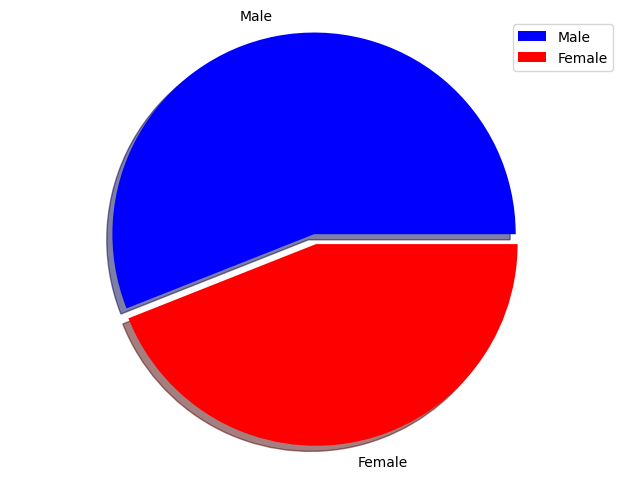

In [20]:
plt.pie(customer_df['Gender'].value_counts(), labels=['Male','Female'], colors=['Blue','Red'], shadow=True,explode=[0,0.05])
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

Although there are slightly more male customers, the data is pretty balanced in terms of gender.

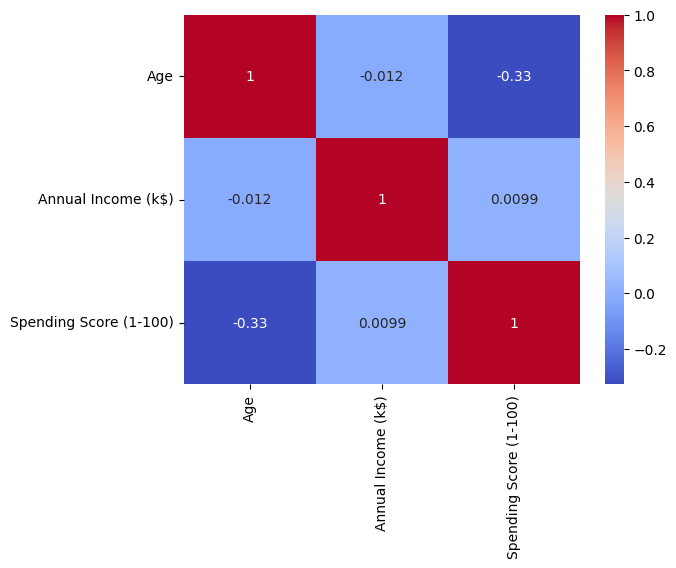

In [25]:
numeric_cols = customer_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

There is no evidence of multicollinearity among the variables, as the off-diagonal values are all less than |0.33|. The strongest correlation present is a negative correlation between Age and Spending Score (approximately -0.33), indicating that as age increases, the spending score tends to decrease.

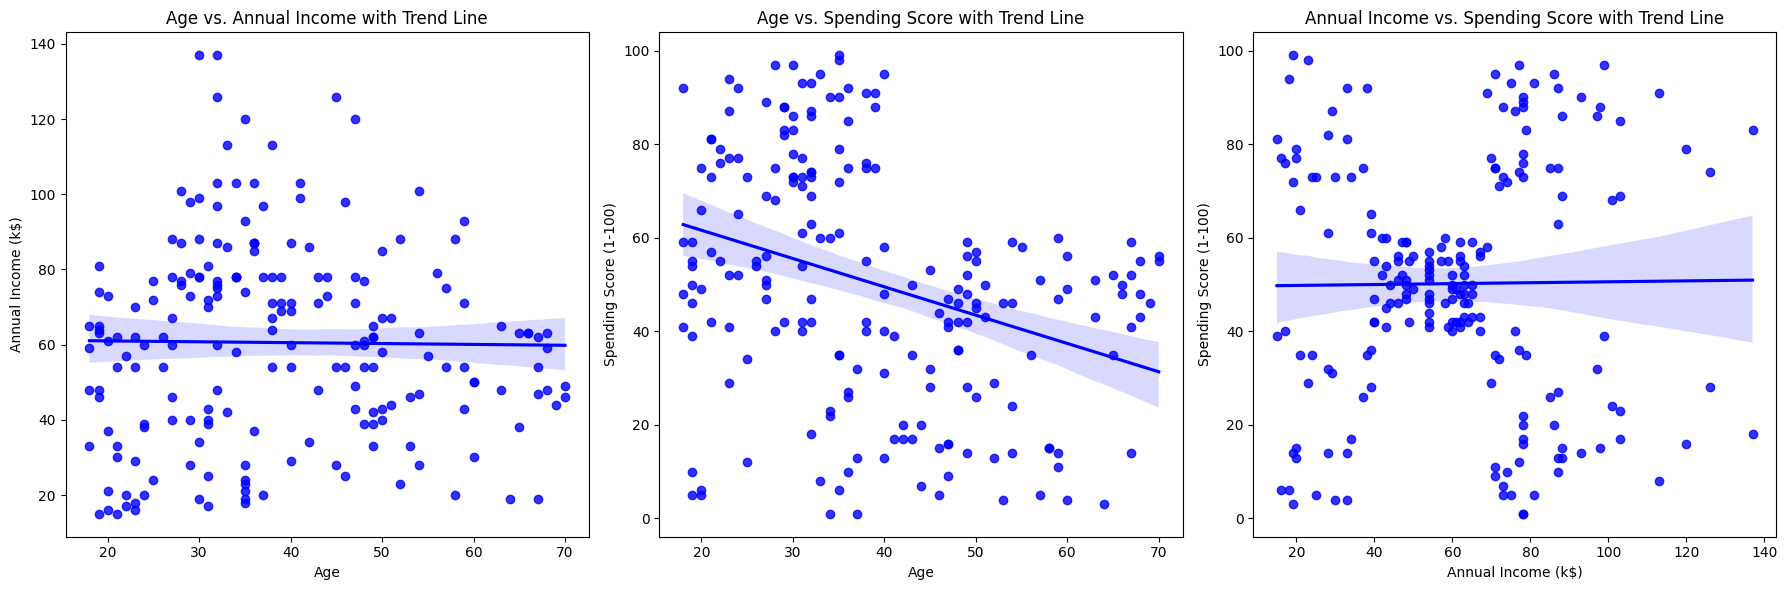

In [34]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.regplot(x='Age', y='Annual Income (k$)', data=customer_df, color='blue', line_kws={'color': 'blue'})
plt.title('Age vs. Annual Income with Trend Line')

plt.subplot(1, 3, 2)
sns.regplot(x='Age', y='Spending Score (1-100)', data=customer_df, color='blue', line_kws={'color': 'blue'})
plt.title('Age vs. Spending Score with Trend Line')

plt.subplot(1, 3, 3)
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_df, color='blue', line_kws={'color': 'blue'})
plt.title('Annual Income vs. Spending Score with Trend Line')

plt.tight_layout()

plt.show()

The analysis of the customer dataset reveals that age has a slight negative correlation with spending score, indicating younger customers might have higher spending scores.But other variables didn't have almost any correlations.

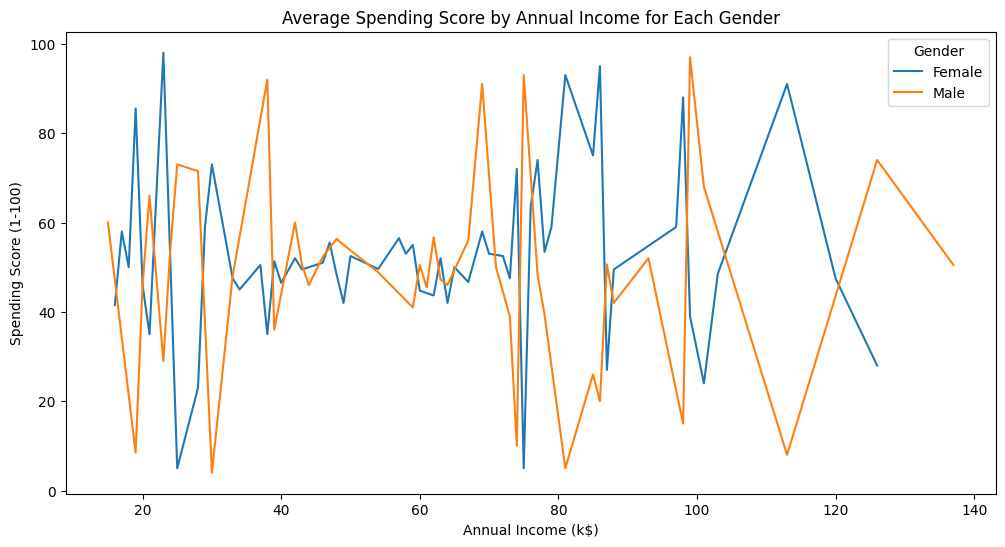

In [35]:
grouped = customer_df.groupby(['Gender', 'Annual Income (k$)'])['Spending Score (1-100)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Average Spending Score by Annual Income for Each Gender')
plt.show()

For income under 40 and over 60, there was an interesting trend that male and female showed opposite spending for each income.

In [36]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

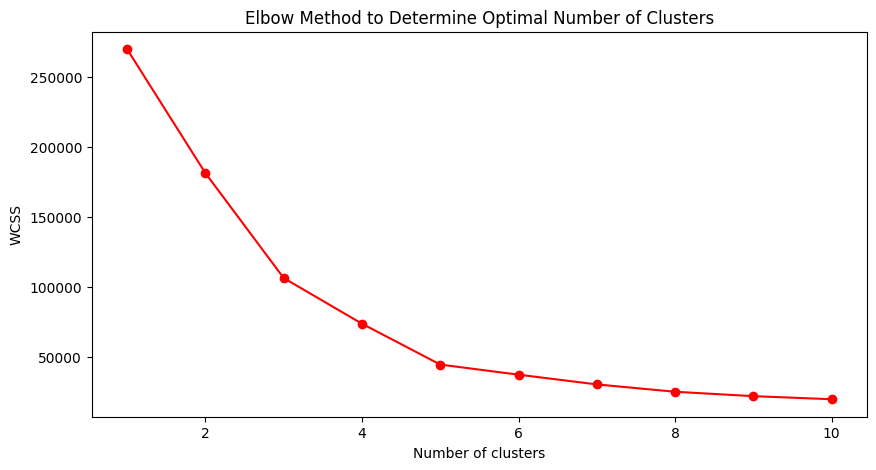

In [46]:
features = customer_df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot, 5 seems to be the optimal k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


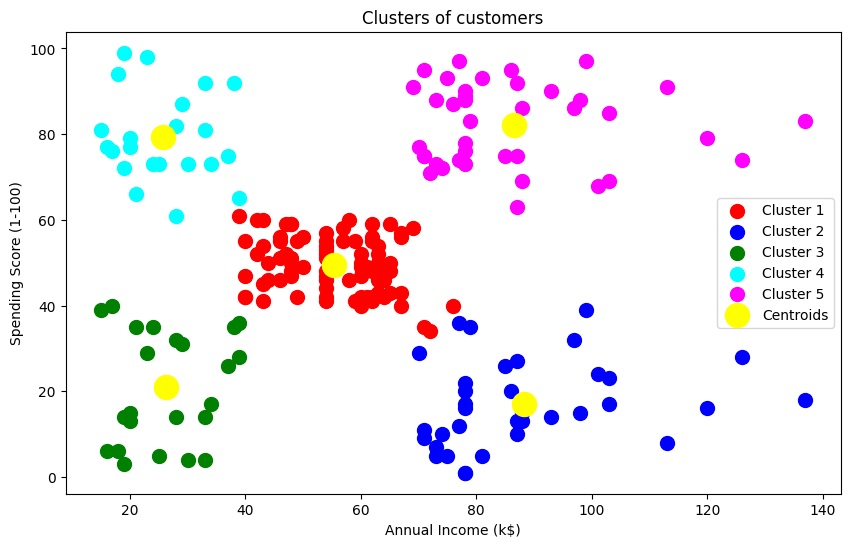

In [48]:
optimal_k = 5


kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(features)

clusters = kmeans.predict(features)

customer_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(customer_df['Annual Income (k$)'][customer_df['Cluster'] == 0], customer_df['Spending Score (1-100)'][customer_df['Cluster'] == 0], s=100, c='red', label='Cluster 1')
plt.scatter(customer_df['Annual Income (k$)'][customer_df['Cluster'] == 1], customer_df['Spending Score (1-100)'][customer_df['Cluster'] == 1], s=100, c='blue', label='Cluster 2')
plt.scatter(customer_df['Annual Income (k$)'][customer_df['Cluster'] == 2], customer_df['Spending Score (1-100)'][customer_df['Cluster'] == 2], s=100, c='green', label='Cluster 3')
plt.scatter(customer_df['Annual Income (k$)'][customer_df['Cluster'] == 3], customer_df['Spending Score (1-100)'][customer_df['Cluster'] == 3], s=100, c='cyan', label='Cluster 4')
plt.scatter(customer_df['Annual Income (k$)'][customer_df['Cluster'] == 4], customer_df['Spending Score (1-100)'][customer_df['Cluster'] == 4], s=100, c='magenta', label='Cluster 5')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [54]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

normalized_df = normalize(scaled_df)

# Converting the scaled data back into a pandas DataFrame
normalized_df = pd.DataFrame(data=normalized_df)

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head()

,P1,P2
0,-0.363554,-0.836063
1,-0.914915,-0.226099
2,0.169294,-0.911011
3,-0.897225,-0.276430
4,-0.373792,-0.831518


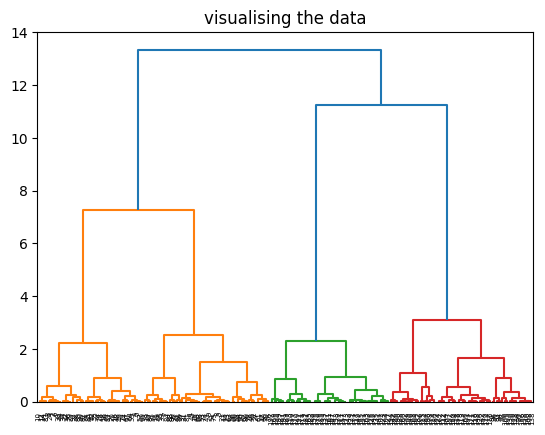

In [56]:
import scipy.cluster.hierarchy as shc

plt.title('visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

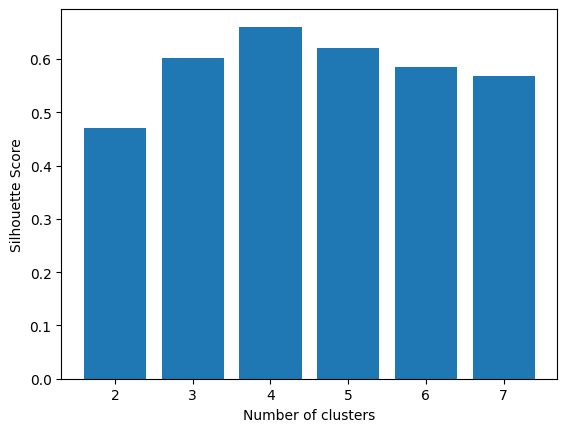

In [57]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))

plt.bar(x=range(2, 8), height=silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

4 seems to be optimal

In [63]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=4)

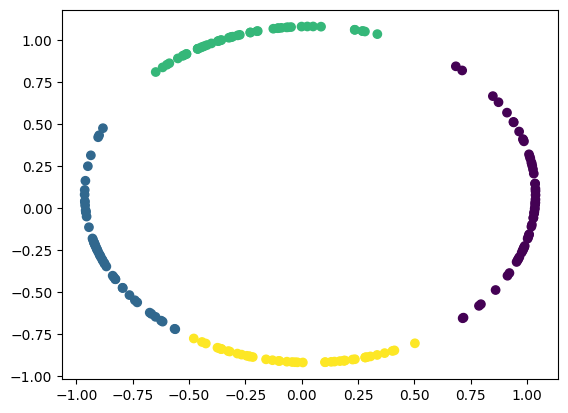

In [64]:
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AgglomerativeClustering(n_clusters = 4).fit_predict(X_principal))
plt.show()

K-means vs Hierarchical (pro/cons, useage):
K-means is efficient for large, well-separated data, but is limited by the need to predefine k and its sensitivity to initial conditions, while hierarchical clustering excels in revealing data structure without predefining the number of clusters, yet can be computationally heavy and sensitive to noise. Thus, K-means is well-suited for applications like customer segmentation or image compression where the structure is flat, and clusters are of similar density. Hierarchical clustering could be used for gene sequence analysis or organizing computing clusters where the relationship between clusters is also of interest.

Findings from my Kmeans and Hierarchical:

The k-means clustering visualization indicates that the customer dataset can be segmented into five distinct groups based on their annual income and spending score. Cluster 1 shows a group with high income but lower spending scores, indicating more conservative spenders. Cluster 2 captures those with moderate income and spending levels. Cluster 3 represents high earners with high spending scores, potentially reflecting a more luxurious lifestyle. Cluster 4 includes customers with low income and low spending scores, which could be more price-sensitive customers. Lastly, Cluster 5 shows low income but higher spending scores, suggesting individuals who, despite lower earnings, prioritize spending. The centroids (yellow points) mark the central point of each cluster, giving a reference for the average income and spending score within each segment.

The hierarchical clustering visualization presents data points grouped into four distinct, non-linear clusters, suggesting a natural division within the dataset that doesn't conform to simple spherical shapes as in k-means clustering.